In [1]:
import configparser
import pandas as pd
import numpy as np

config = configparser.ConfigParser()
config.read('settings.ini')

max_count = int(config['Main']['vis_count'])
dataset_path = config['Main']['output_folder'] + '/' + config['Main']['output_file_s1']

print('Dataset path: ' + dataset_path)

Dataset path: ./output/dataset_s1.csv


In [2]:
df = pd.read_csv(dataset_path)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,FileName,FileDir,Emotion,Intensity,AudioLength,SampleRate
0,03-01-02-02-01-02-01.wav,./datasets/Ravdess/audio_speech_actors_01-24/A...,calm,high,4.004000,48000
1,03-01-02-02-01-01-01.wav,./datasets/Ravdess/audio_speech_actors_01-24/A...,calm,high,3.703708,48000
2,03-01-01-01-02-02-01.wav,./datasets/Ravdess/audio_speech_actors_01-24/A...,neutral,medium,3.169833,48000
3,1001_DFA_ANG_XX.wav,./datasets/CREMA-D/AudioWAV,angry,unknown,2.275562,16000
4,03-01-01-01-02-01-01.wav,./datasets/Ravdess/audio_speech_actors_01-24/A...,neutral,medium,3.269917,48000


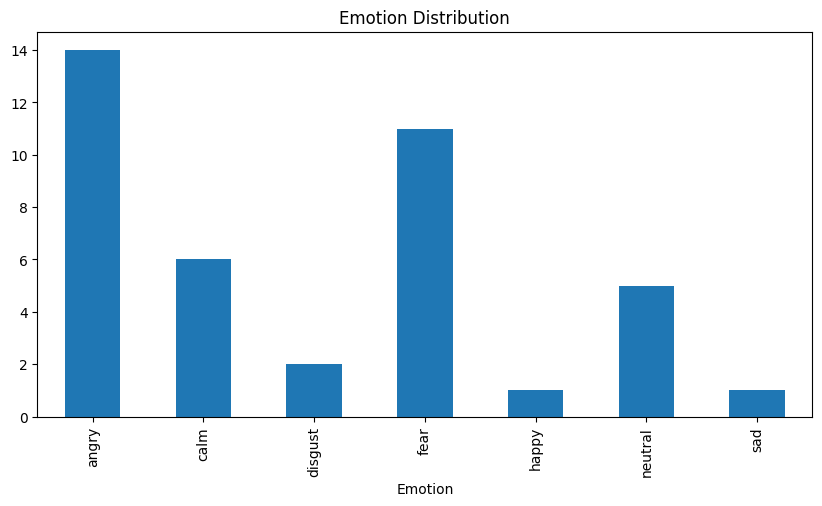

In [3]:
graph = df.groupby(['Emotion']).count()['FileName'].plot.bar(figsize=(10, 5), title='Emotion Distribution')

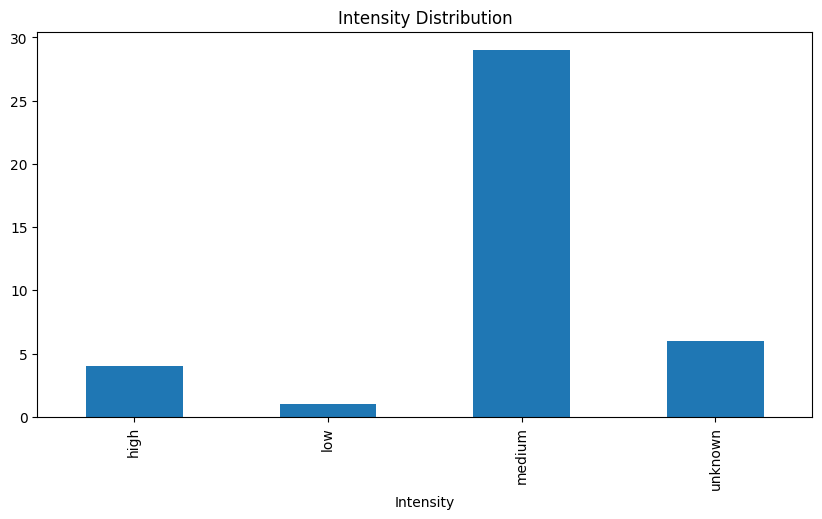

In [4]:
graph2 = df.groupby(['Intensity']).count()['FileName'].plot.bar(figsize=(10, 5), title='Intensity Distribution')

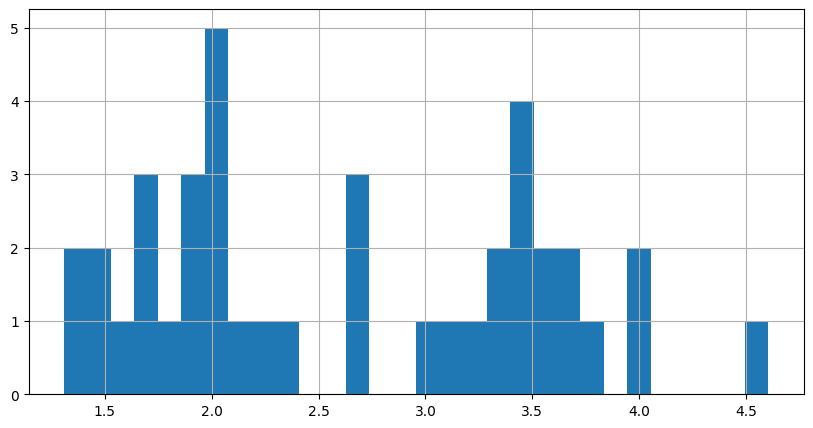

In [5]:
# AudioLength Histogram
graph3 = df['AudioLength'].hist(figsize=(10, 5), bins=30)

In [6]:
# Max audio length
print('Max audio length: ' + str(df['AudioLength'].max()))

# Min audio length
print('Min audio length: ' + str(df['AudioLength'].min()))

#90% percentile
print('90% percentile: ' + str(df['AudioLength'].quantile(0.90)))

Max audio length: 4.604285714285714
Min audio length: 1.3083067092651757
90% percentile: 3.7069429421768705


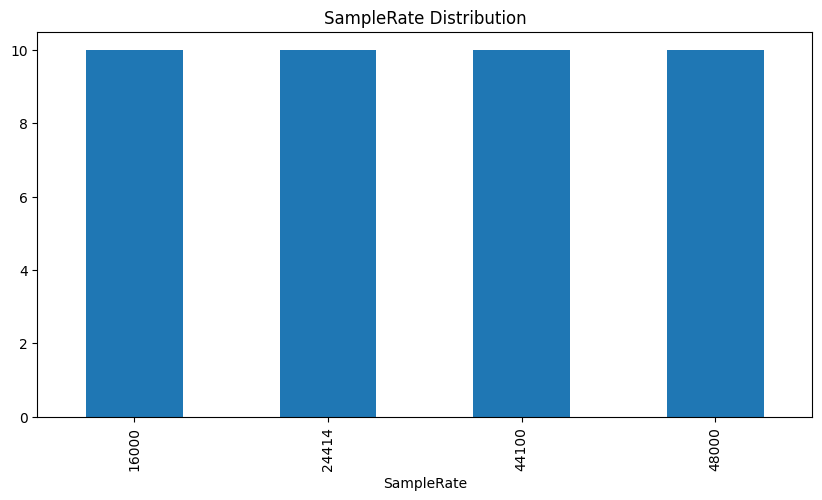

In [7]:
# SampleRate Bar Chart
graph4 = df.groupby(['SampleRate']).count()['FileName'].plot.bar(figsize=(10, 5), title='SampleRate Distribution')

In [8]:
dataset_path = config['Main']['output_folder'] + '/' + config['Main']['output_file_s2']
df = pd.read_csv(dataset_path)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Emotion,Intensity,AudioLength,file
0,angry,medium,3.500000,./output/datasets_v1/DC_a06.wav
1,angry,medium,2.997914,./output/datasets_v1/DC_a05.wav
2,fear,medium,1.308307,./output/datasets_v1/OAF_bite_fear.wav
3,angry,low,2.068750,./output/datasets_v1/1001_IEO_ANG_LO.wav
4,calm,high,3.500000,./output/datasets_v1/03-01-02-02-01-01-01.wav


In [9]:
import matplotlib.pyplot as plt
import librosa

In [10]:
# Get audio waveforms
def get_audio_waveform(row):
    data, sr = librosa.load(row['file'], sr=None)
    return data

df['data'] = df.apply(get_audio_waveform, axis=1)

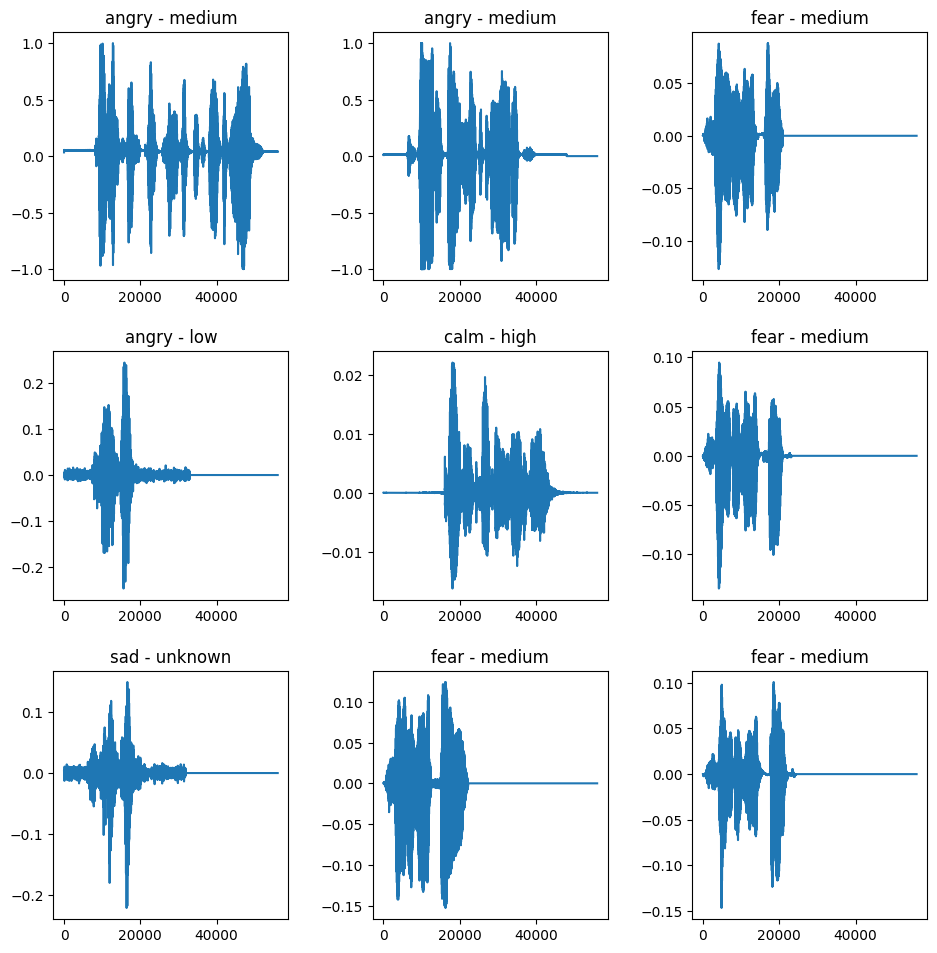

In [11]:
# Draw audio waveforms as subplots

fig, axs = plt.subplots(int(max_count/3), int(max_count/3), figsize=(10, 10))
fig.tight_layout(pad=3.0)

for i in range(max_count):
    axs[int(i/3)][i % 3].set_title(df.iloc[i]['Emotion'] + ' - ' + df.iloc[i]['Intensity'])
    axs[int(i/3)][i % 3].plot(df['data'].iloc[i])

In [12]:
from functions import noise, stretch, shift, pitch, cutoffs
import IPython.display as ipd

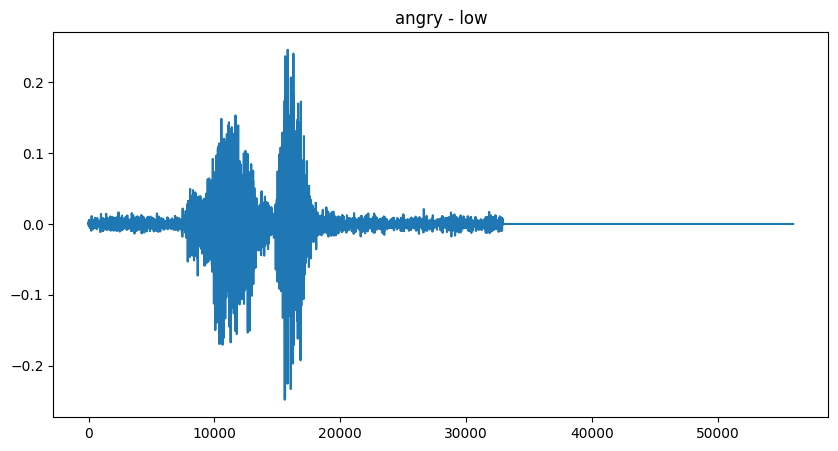

In [13]:
data = get_audio_waveform(df.iloc[3])

# Draw audio waveform
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'])
plt.plot(data)
ipd.Audio(data, rate=16000)

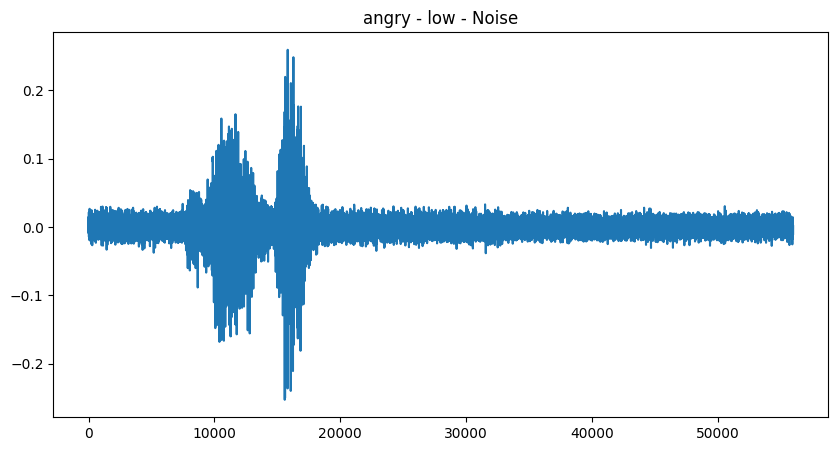

In [14]:
# Noise
data_n = noise(data)
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Noise')
plt.plot(data_n)
ipd.Audio(data_n, rate=16000)

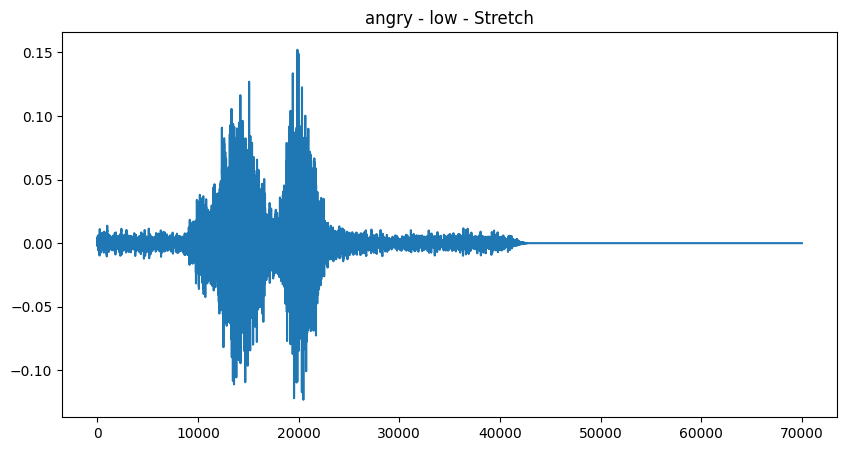

In [15]:
# Stretch
data_s = stretch(data)
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Stretch')
plt.plot(data_s)
ipd.Audio(data_s, rate=16000)

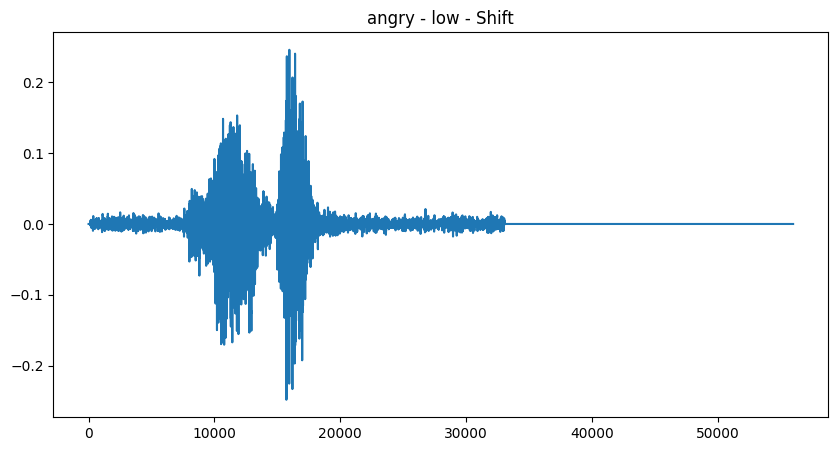

In [16]:
# Shift
data_sh = shift(data)
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Shift')
plt.plot(data_sh)
ipd.Audio(data_sh, rate=16000)

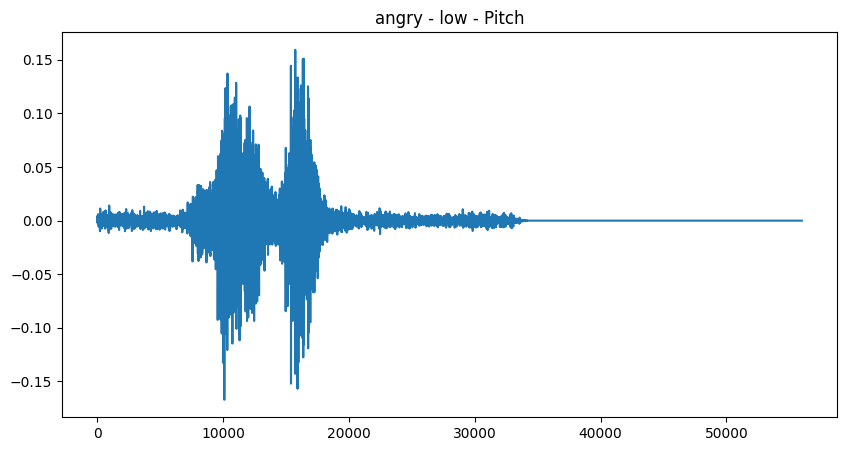

In [17]:
# Pitch
data_p = pitch(data, 16000)
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Pitch')
plt.plot(data_p)
ipd.Audio(data_p, rate=16000)

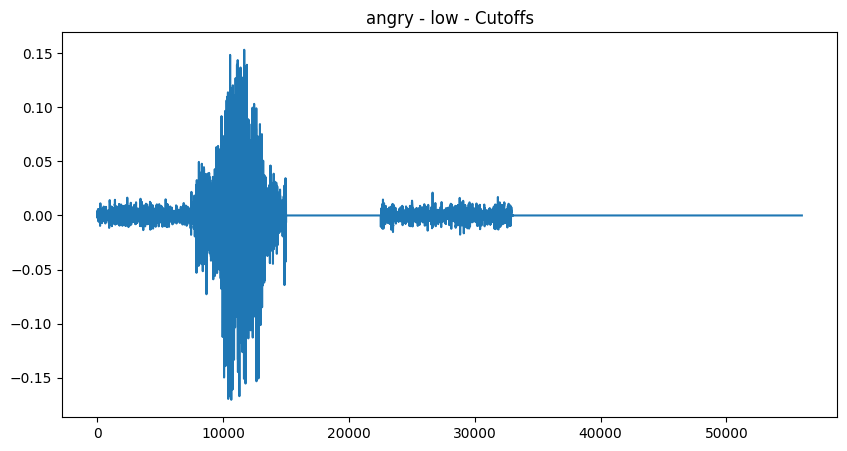

In [18]:
# Cutoffs
data_c = cutoffs(data)
# Cutoffs
ipd.Audio(data_c, rate=16000)

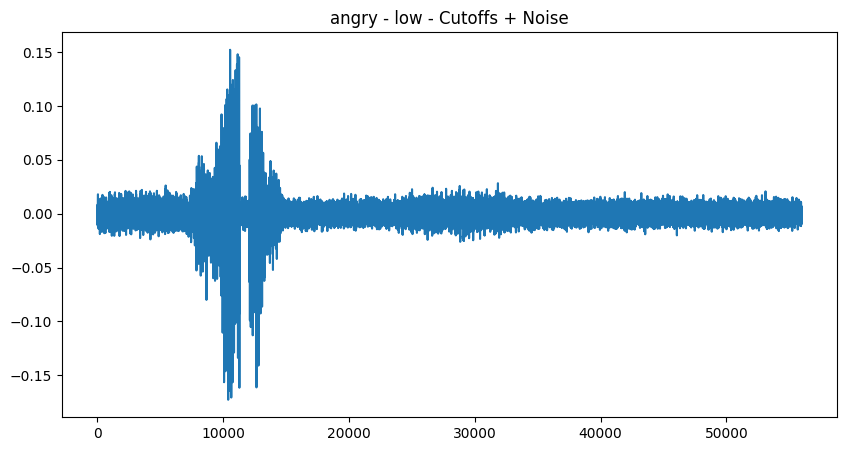

In [19]:
# CutOffs + Noise
data_cn = noise(cutoffs(data))
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Cutoffs + Noise')
plt.plot(data_cn)
ipd.Audio(data_cn, rate=16000)

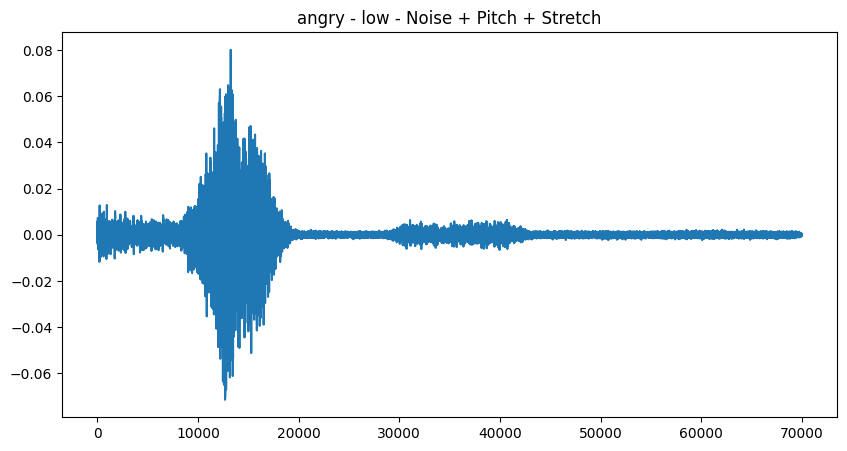

In [20]:
# Noise + Pitch + Stretch
data_nps = stretch(pitch(noise(data), 16000))
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Noise + Pitch + Stretch')
plt.plot(data_nps)
ipd.Audio(data_nps, rate=16000)

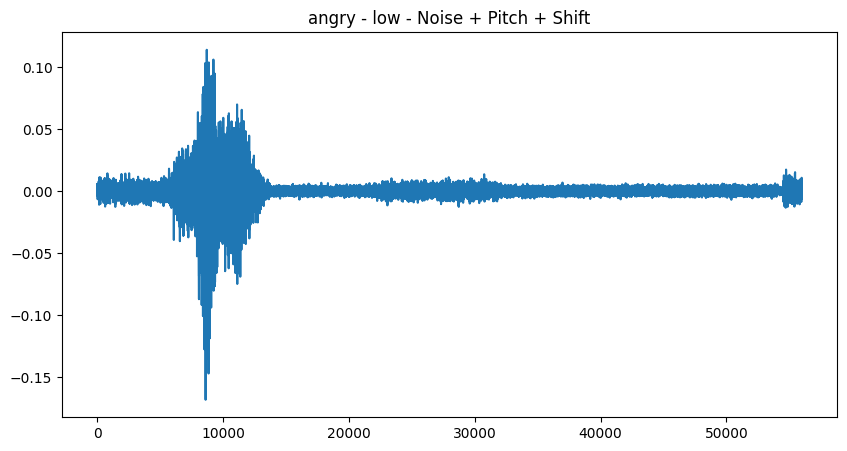

In [21]:
# Noise + Pitch + Shift
data_nph = shift(pitch(noise(data), 16000))
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Noise + Pitch + Shift')
plt.plot(data_nph)
ipd.Audio(data_nph, rate=16000)

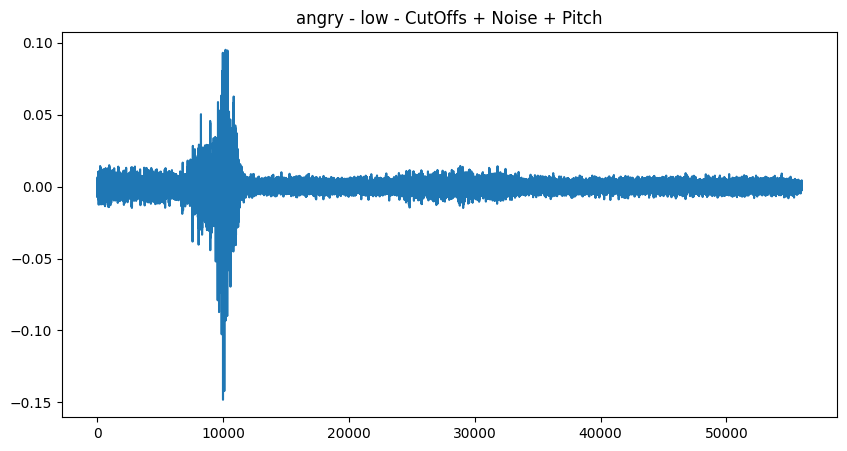

In [22]:
# CutOffs + Noise + Pitch
data_cnp = pitch(noise(cutoffs(data)), 16000)
plt.figure(figsize=(10, 5))
plt.title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - CutOffs + Noise + Pitch')
plt.plot(data_cnp)
ipd.Audio(data_cnp, rate=16000)